# **Project plan for denoising an audio file**

**Load the audio file:** Use a library like scipy.io or pydub to load the audio file in Python. Check the sample rate, bit depth, and number of channels of the audio file.

**Visualize the audio signal:** Plot the audio signal in the time domain using a library like matplotlib. Check if the audio signal is clean or contains noise. Identify the duration of the audio file.

**Preprocess the audio signal:** If the audio signal contains noise, preprocess it to remove any unwanted signals. For example, you can use a bandpass filter to remove noise outside of a specific frequency range, or use a high-pass filter to remove low-frequency noise.

**Compute the power spectral density:** Compute the power spectral density (PSD) of the audio signal using a library like scipy.signal. The PSD will help you identify the frequencies that contain noise in the signal.

**Visualize the PSD:** Plot the PSD in the frequency domain using a library like matplotlib. Check if the noise frequencies are visible in the PSD.

**Remove the noise frequencies:** Based on the PSD plot, identify the noise frequencies that need to be removed from the audio signal. You can either manually identify the frequencies or use an algorithm to automatically detect the noise frequencies. Use a band-stop filter or a notch filter to remove the noise frequencies.

**Visualize the filtered audio signal:** Plot the filtered audio signal in the time domain using a library like matplotlib. Check if the noise has been removed from the signal.

**Save the denoised audio file:** Save the denoised audio signal to a new file using the same sample rate, bit depth, and number of channels as the original file.

Note that the actual implementation of each step may vary depending on the specific requirements of the project and the characteristics of the audio signal.

# Load and Visualize the audio signal
This will plot the audio signal as a function of sample index on the x-axis and amplitude on the y-axis. You can adjust the plot size, color, and other parameters as needed.

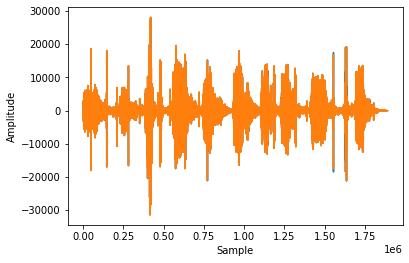

In [27]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sampling_freq, audio_signal = wavfile.read('humpback_whale.wav')

# Plot the audio signal
plt.plot(audio_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Use the `wavfile.read()` function to load the audio file. This function returns the audio sampling frequency and the audio signal as a 1D NumPy array.

# Power Spectrum Density

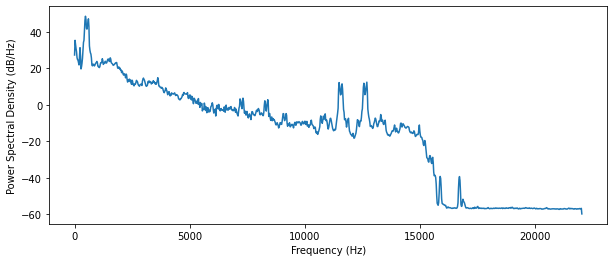

Noise frequencies: [430.6640625  452.19726562 473.73046875 495.26367188 516.796875
 538.33007812 559.86328125 581.39648438 602.9296875  624.46289062]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Load the audio file
sampling_freq, audio = wavfile.read('humpback_whale.wav')

# Convert the audio signal to mono if it's stereo
if audio.ndim > 1:
    audio = np.mean(audio, axis=1)

# Set the parameters for the PSD
NFFT = 2048
noverlap = NFFT // 2

# Compute the PSD of the audio signal
f, psd = signal.welch(audio, fs=sampling_freq, nperseg=NFFT, noverlap=noverlap)

# Plot the PSD
plt.figure(figsize=(10, 4))
plt.plot(f, 10*np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.show()

# Identify the noise frequencies
threshold = np.mean(psd) + np.std(psd)
noise_freqs = f[psd > threshold]
print('Noise frequencies:', noise_freqs)

This code loads an audio file 'humpback_whale.wav', converts it to mono if it's stereo, computes the power spectral density (PSD) of the audio signal using the Welch method, and plots the PSD. Finally, it identifies the noise frequencies based on a threshold defined as the mean plus one standard deviation of the PSD values, and prints the identified noise frequencies.

Line 7: Load the audio file using `wavfile.read()` from `scipy.io`.

Line 10: Convert the audio signal to mono if it is stereo by taking the mean along the second axis using `np.mean()`.

Line 14-15: Set the parameters for computing the PSD of the audio signal using the Welch method. NFFT is the number of data points used in each block of the FFT computation, noverlap is the number of overlapping data points between consecutive blocks.

Line 18: Compute the PSD of the audio signal using the Welch method with `signal.welch()` from scipy.signal. The function returns the frequency vector f and the PSD vector psd.

Line 21-24: Plot the PSD using plt.plot(). f is the x-axis, and `10*np.log10(psd)` is the y-axis. plt.xlabel() and plt.ylabel() set the axis labels. plt.show() displays the plot.

Line 27: Identify the noise frequencies based on a threshold defined as the mean plus one standard deviation of the PSD values. threshold is calculated as the mean of the PSD values plus one standard deviation using np.mean() and np.std(). The frequencies with PSD values above the threshold are extracted from f and stored in noise_freqs. Finally, noise_freqs is printed using print().

# Spectrogram

The power spectrum shows how the power of the audio signal is distributed across different frequencies over time. In the graph, you can see the spectral content of the audio signal, including the dominant frequency components and their variation over time. The power spectrum can be useful for analyzing the characteristics of the audio signal, such as its frequency content, harmonics, and spectral shape, which can be important for various audio processing tasks such as filtering, equalization, and feature extraction.

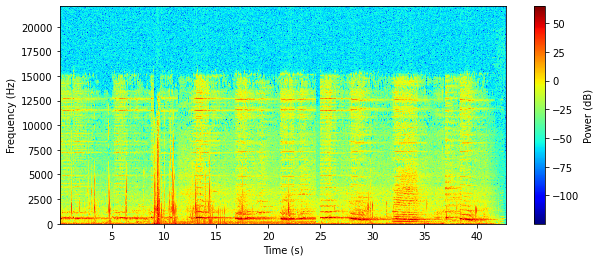

In [26]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

# Load the audio signal
sampling_freq, audio = wavfile.read('humpback_whale.wav')

# Convert the audio signal to mono if it's stereo
if audio.ndim > 1:
    audio = np.mean(audio, axis=1)

# Set the parameters for the power spectrum calculation
window_size = 2048
hop_size = 512

# Calculate the power spectrum
frequencies, times, spectrogram = signal.spectrogram(
    audio, fs=sampling_freq, window='hann', nperseg=window_size, noverlap=hop_size, detrend=False)

# Convert the power spectrum to dB scale
spectrogram_db = 10 * np.log10(spectrogram)

# Plot the power spectrum
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, spectrogram_db, cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

Here's a brief description of each line of code:

`import numpy as np` - import the NumPy library and use the alias np

`from scipy.io import wavfile` - import the wavfile function from the scipy.io library

`from scipy import signal` - import the signal module from the scipy library

`import matplotlib.pyplot as plt` - import the Matplotlib library and use the alias plt

`sampling_freq, audio = wavfile.read('humpback_whale.wav')` - load the audio signal from a WAV file and store the sampling frequency and audio data in the sampling_freq and audio variables

`if audio.ndim > 1:` - check if the audio signal is stereo and convert it to mono if necessary

`window_size = 2048` - set the size of the analysis window used for the power spectrum calculation

`hop_size = 512` - set the hop size between successive windows

`frequencies, times, spectrogram = signal.spectrogram(audio, fs=sampling_freq, window='hann', nperseg=window_size, noverlap=hop_size, detrend=False)` - calculate the power spectrum of the audio signal using the signal.spectrogram() function from the scipy library. This function returns the frequency bins, time bins, and power spectrum as three NumPy arrays stored in the frequencies, times, and spectrogram variables, respectively.

`spectrogram_db = 10 * np.log10(spectrogram)` - convert the power spectrum to the dB scale using the logarithmic function

`plt.figure(figsize=(10, 4))` - create a new figure with a specified size

`plt.pcolormesh(times, frequencies, spectrogram_db, cmap='jet')` - plot the power spectrum as a colormap using the plt.pcolormesh() function. The x-axis represents time in seconds, the y-axis represents frequency in Hz, and the color represents the power in dB.

`plt.xlabel('Time (s)')` - set the x-axis label

`plt.ylabel('Frequency (Hz)')` - set the y-axis label

`plt.colorbar(label='Power (dB)')` - add a colorbar to the plot with a specified label 16

The graph drawn by the code shows the power spectrum of an audio signal. The x-axis represents time in seconds, the y-axis represents frequency in Hz, and the color represents the power in dB. The brighter colors (i.e., colors closer to white) represent higher power values, and the darker colors (i.e., colors closer to black) represent lower power values.

# Filter design, visualize and save filtered signal

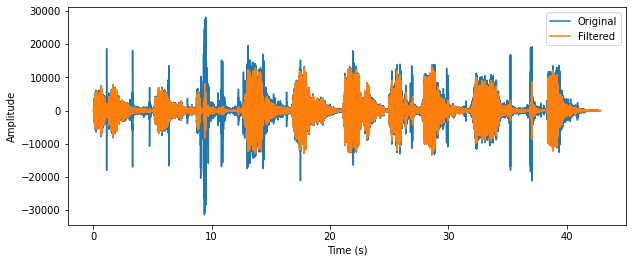

In [25]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

# Load the audio signal
sampling_freq, audio = wavfile.read('humpback_whale.wav')

# Convert the audio signal to mono if it's stereo
if audio.ndim > 1:
    audio = np.mean(audio, axis=1)

# Set the bandpass filter parameters
low_freq = 430  # Hz
high_freq = 624  # Hz
filter_order = 4

# Create the bandpass filter
nyquist_freq = 0.5 * sampling_freq
low = low_freq / nyquist_freq
high = high_freq / nyquist_freq
b, a = signal.butter(filter_order, [low, high], btype='band')

# Apply the filter to remove noise from the audio signal
audio_filtered = signal.filtfilt(b, a, audio)

# Plot the original and filtered audio signals
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio)) / sampling_freq, audio, label='Original')
plt.plot(np.arange(len(audio_filtered)) / sampling_freq, audio_filtered, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Save the filtered audio signal to a file
wavfile.write('humpback_whale_filtered.wav', sampling_freq, np.asarray(audio_filtered, dtype=np.int16))


`from scipy.io import wavfile`

The wavfile module from scipy.io is a Python library used for working with audio files in WAV format. It provides a simple interface for reading and writing audio data, as well as for querying and modifying the properties of WAV files.


```
# Load the audio signal
sampling_freq, audio = wavfile.read('humpback_whale.wav')
```
This code reads an audio file called "`humpback_whale.wav`" using the `wavfile.read()` function from the `scipy.io` library. The sample rate of the audio file is stored in the `sampling_freq` variable, and the audio data itself is stored in the audio variable as a one-dimensional NumPy array.

Assuming that the "humpback_whale.wav" file exists in the same directory as the Python script, this code should load the audio file into memory and allow you to work with its audio data.

You can then process the audio data in various ways, such as visualizing it, performing Fourier transforms to obtain its frequency content, or applying filters to remove noise. The specific processing steps will depend on the goals of your project or analysis.


```
# Convert the audio signal to mono if it's stereo
if audio.ndim > 1:
    audio = np.mean(audio, axis=1)
```
This code checks if the loaded audio data has more than one channel (i.e., if it's stereo). If the audio data is stereo, the code converts it to mono by taking the mean of the two channels along the axis=1 dimension using the NumPy `np.mean()` function.

When stereo audio is loaded, it contains two separate channels of audio data: one for the left speaker and one for the right speaker. However, some audio processing algorithms only work with mono audio, which has a single channel of audio data. To ensure that the loaded audio can be processed by these algorithms, it is often necessary to convert stereo audio to mono.

Taking the mean of the two channels is a simple way to convert stereo audio to mono. This is because the left and right channels typically contain similar or identical audio data, and taking their mean produces a single channel of audio data that represents the average of both channels. However, there are other methods for converting stereo audio to mono, such as selecting only one channel or using more sophisticated signal processing techniques.



```
# Set the bandpass filter parameters
low_freq = 430  # Hz
high_freq = 624  # Hz
filter_order = 4
```

This code sets the parameters for a bandpass filter that can be used to remove unwanted frequencies from the audio data. The bandpass filter only allows frequencies within a certain range to pass through, while attenuating frequencies outside of that range.

The low_freq and high_freq variables define the lower and upper cutoff frequencies of the bandpass filter, respectively. In this case, the filter will only allow frequencies between 430 Hz and 624 Hz to pass through, which can be useful for isolating specific frequency ranges in the audio data.

The filter_order variable specifies the order of the filter, which determines how steeply the filter attenuates frequencies outside of the passband. A higher filter order generally results in a steeper cutoff and more precise filtering, but may also introduce more artifacts or distortion in the filtered signal. A fourth-order filter, as specified in this code, is a common choice that balances filtering precision and simplicity.

These parameters can be adjusted to achieve the desired filtering effect for a particular audio signal and application.


```
# Create the bandpass filter
nyquist_freq = 0.5 * sampling_freq
low = low_freq / nyquist_freq
high = high_freq / nyquist_freq
b, a = signal.butter(filter_order, [low, high], btype='band')
```
This code creates a bandpass filter using the Butterworth filter design method from the scipy.signal library. The Butterworth filter is a common type of filter that provides a maximally flat passband response, meaning that it introduces minimal distortion or ripple in the frequencies that pass through the filter.

The code first calculates the Nyquist frequency, which is half of the sampling frequency and represents the highest frequency that can be represented in the digital audio signal. This value is used to normalize the filter cutoff frequencies to the range of 0 to 1, which is required by the Butterworth filter design function.

The low and high variables are the normalized cutoff frequencies of the bandpass filter, which were calculated based on the desired low and high frequencies specified in the previous code block.

The signal.butter() function is then called to design the filter coefficients for a bandpass filter of the specified order and cutoff frequencies. The btype parameter is set to 'band' to indicate that the filter is a bandpass filter.

The resulting b and a variables contain the filter coefficients that can be used to apply the bandpass filter to the audio data using the signal.filtfilt() function from the same library. Applying this filter to the audio data will remove frequencies outside of the desired range and pass through only those frequencies within the range.



```
# Apply the filter to remove noise from the audio signal
audio_filtered = signal.filtfilt(b, a, audio)
```
This code applies the bandpass filter created in the previous code block to the audio data stored in the audio variable using the `signal.filtfilt()` function from the scipy.signal library.

The `signal.filtfilt()` function applies a linear digital filter to a signal using a forward-backward filtering approach that ensures zero-phase distortion, meaning that the filtered signal is not shifted in time relative to the original signal.

The function takes as input the filter coefficients (b and a) and the audio data to be filtered (audio), and returns the filtered audio data as a NumPy array stored in the audio_filtered variable.

By passing the filter coefficients and audio data through this function, the code removes noise outside of the desired frequency range and returns a filtered audio signal that is easier to analyze or listen to. The resulting audio_filtered variable can be used for further processing or analysis.



```
# Plot the original and filtered audio signals
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio)) / sampling_freq, audio, label='Original')
plt.plot(np.arange(len(audio_filtered)) / sampling_freq, audio_filtered, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
```
This code plots the original and filtered audio signals using the Matplotlib library.

The plt.figure() function is called to create a new figure with a specified size (10 inches wide and 4 inches tall).

The plt.plot() function is then called twice to plot the original and filtered audio signals. The x-axis represents time in seconds and is generated using the np.arange() function that creates a one-dimensional NumPy array with a range of values from 0 to the length of the audio data divided by the sampling frequency. The y-axis represents the amplitude of the audio signal, which is plotted as a continuous line. The label parameter is used to specify the legend label for each plot.

The plt.xlabel() and plt.ylabel() functions are used to set the x and y axis labels, respectively.

The plt.legend() function is called to create a legend that labels each of the plotted lines.

Finally, the plt.show() function is called to display the plot.



```
# Save the filtered audio signal to a file
wavfile.write('humpback_whale_filtered.wav', sampling_freq, np.asarray(audio_filtered, dtype=np.int16))
```
This code saves the filtered audio signal stored in the audio_filtered variable to a new WAV file using the wavfile.write() function from the scipy.io library.

The function takes as input the file name and path to save the new WAV file, the sampling frequency of the audio data (sampling_freq), and the audio data itself (audio_filtered) in the form of a NumPy array.

The dtype parameter is set to np.int16 to specify the data type of the audio data as a 16-bit integer. This is required by the WAV file format.

By running this code, the filtered audio signal is saved as a new WAV file in the specified file location, which can be used for further analysis or listening.
